In [8]:
pwd

'C:\\Users\\ZBook\\Desktop\\COURS 2020-2021\\S1\\Python for data analysis\\PROJET'

In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [11]:
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import mean_squared_error as mse
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.svm import LinearSVC
from sklearn.ensemble import VotingClassifier
from sklearn.feature_selection import RFECV
from sklearn.preprocessing import minmax_scale
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV

In [12]:
df = pd.read_table("spambase.data", sep =',', header=None)
df.columns

Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
            17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
            34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
            51, 52, 53, 54, 55, 56, 57],
           dtype='int64')

In [13]:
#Let's work on data correlation

correlation = df.corr().to_numpy()

l = len(correlation)

def listcor(cor,seuil):                #donne la liste des elements très corrélés entre eux
    list_cor = []
    for i in range(l):
        for j in range(i+1,l):
            if cor[i,j]> seuil:
                list_cor+=[[i,j]]
    return(list_cor)

def list_correlated(data,seuil):
    list_elem = []
    cpt = -1
    ref = 0
    correlation = data.corr().to_numpy()
    list_corr=listcor(correlation,seuil)
    for elem in list_corr :
        if elem[0] != ref :
            ref = elem[0]
            list_elem.append([elem[0]])
            cpt+=1
            list_elem[cpt].append(elem[1])              
        else :
            list_elem[cpt].append(elem[1])   #on a la liste des elements corrélés entre eux par "paquets"
    return(list_elem)
            
a = list_correlated(df,0.6)
print(a)
for i in range(len(a[0])):
    print(i)
    b = df[a[0][i]].corr(df[57])
    print(b)
    print(a[0][i])
    

# ces features ont de toute facon une très faible corrélation avec la prediction de spam, on les retirera donc au préalable dans 
# une des versions testées ci-après



[[29, 30, 31, 33, 35, 39], [30, 31, 33, 35, 39], [31, 33, 35, 39], [33, 35, 39], [35, 39]]
0
-0.1710945875470931
29
1
-0.12691215770486758
30
2
-0.11421403277162036
31
3
-0.11275418527473718
33
4
-0.13613420484604244
35
5
-0.06480120227696293
39


In [14]:
dict_1={}

dict_1=dict(df.corr()[57])
dict_1

{0: 0.1262075747276322,
 1: -0.030223579212021543,
 2: 0.1969879726831455,
 3: 0.05737138961858829,
 4: 0.2419204377148765,
 5: 0.232604300172187,
 6: 0.3321174156141586,
 7: 0.20680847576170805,
 8: 0.23155143128601532,
 9: 0.13896211329514088,
 10: 0.23452927138249544,
 11: 0.007740737297956368,
 12: 0.13292672586847548,
 13: 0.060027316399873264,
 14: 0.19590245671258405,
 15: 0.26321469903669603,
 16: 0.2632039828223917,
 17: 0.20420813879714014,
 18: 0.2736512865572106,
 19: 0.1897611485080607,
 20: 0.3832338192835756,
 21: 0.09186009631515232,
 22: 0.3347870388457389,
 23: 0.21611098224724426,
 24: -0.2567229163126616,
 25: -0.23296768680660979,
 26: -0.1834040051933605,
 27: -0.15880024911827956,
 28: -0.13352318779632708,
 29: -0.1710945875471117,
 30: -0.1269121577048615,
 31: -0.11421403277162386,
 32: -0.11993101263694417,
 33: -0.11275418527472239,
 34: -0.14922521446054307,
 35: -0.13613420484603733,
 36: -0.17804545978118416,
 37: -0.03103528941229571,
 38: -0.12283065400

In [15]:
list_features=[]    #on recupere la liste des elements peu corrélés avec la variable a predire, on note qu'ils sont presques tous très peu corrélés
for key,values in dict_1.items():    
    if abs(values)<0.15:
        list_features.append(key)
list_features

[0,
 1,
 3,
 9,
 11,
 12,
 13,
 21,
 28,
 30,
 31,
 32,
 33,
 34,
 35,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 53,
 54]

In [16]:
y = df[np.shape(df)[1]-1]
x= df.drop([np.shape(df)[1]-1],axis = 1)

### x et y sans preprocessing

In [18]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0,test_size=0.3)

In [19]:
LR = LogisticRegression(max_iter=10000)

scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
scores = cross_validate(LR, x_train, y_train, scoring=scoring, cv=20)

sorted(scores.keys())
LR_fit_time = scores['fit_time'].mean()
LR_score_time = scores['score_time'].mean()
LR_accuracy = scores['test_accuracy'].mean()
LR_precision = scores['test_precision_macro'].mean()
LR_recall = scores['test_recall_macro'].mean()
LR_f1 = scores['test_f1_weighted'].mean()
LR_roc = scores['test_roc_auc'].mean()

In [20]:
decision_tree = DecisionTreeClassifier()

scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
scores = cross_validate(decision_tree, x_train, y_train, scoring=scoring, cv=20)

sorted(scores.keys())
dtree_fit_time = scores['fit_time'].mean()
dtree_score_time = scores['score_time'].mean()
dtree_accuracy = scores['test_accuracy'].mean()
dtree_precision = scores['test_precision_macro'].mean()
dtree_recall = scores['test_recall_macro'].mean()
dtree_f1 = scores['test_f1_weighted'].mean()
dtree_roc = scores['test_roc_auc'].mean()

In [21]:
SVM = SVC(probability = True)

scoring = ['accuracy','precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
scores = cross_validate(SVM, x_train, y_train, scoring=scoring, cv=20)

sorted(scores.keys())
SVM_fit_time = scores['fit_time'].mean()
SVM_score_time = scores['score_time'].mean()
SVM_accuracy = scores['test_accuracy'].mean()
SVM_precision = scores['test_precision_macro'].mean()
SVM_recall = scores['test_recall_macro'].mean()
SVM_f1 = scores['test_f1_weighted'].mean()
SVM_roc = scores['test_roc_auc'].mean()

In [22]:
LDA = LinearDiscriminantAnalysis()

scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
scores = cross_validate(LDA, x_train, y_train, scoring=scoring, cv=20)

sorted(scores.keys())
LDA_fit_time = scores['fit_time'].mean()
LDA_score_time = scores['score_time'].mean()
LDA_accuracy = scores['test_accuracy'].mean()
LDA_precision = scores['test_precision_macro'].mean()
LDA_recall = scores['test_recall_macro'].mean()
LDA_f1 = scores['test_f1_weighted'].mean()
LDA_roc = scores['test_roc_auc'].mean()

In [23]:
QDA = QuadraticDiscriminantAnalysis()

scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
scores = cross_validate(QDA, x_train, y_train, scoring=scoring, cv=20)

sorted(scores.keys())
QDA_fit_time = scores['fit_time'].mean()
QDA_score_time = scores['score_time'].mean()
QDA_accuracy = scores['test_accuracy'].mean()
QDA_precision = scores['test_precision_macro'].mean()
QDA_recall = scores['test_recall_macro'].mean()
QDA_f1 = scores['test_f1_weighted'].mean()
QDA_roc = scores['test_roc_auc'].mean()

C:\Users\ZBook\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\ZBook\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\ZBook\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\ZBook\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\ZBook\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\ZBook\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\ZBook\anaconda3\lib\site-

In [24]:
random_forest = RandomForestClassifier()

scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
scores = cross_validate(random_forest, x_train, y_train, scoring=scoring, cv=20)

sorted(scores.keys())
forest_fit_time = scores['fit_time'].mean()
forest_score_time = scores['score_time'].mean()
forest_accuracy = scores['test_accuracy'].mean()
forest_precision = scores['test_precision_macro'].mean()
forest_recall = scores['test_recall_macro'].mean()
forest_f1 = scores['test_f1_weighted'].mean()
forest_roc = scores['test_roc_auc'].mean()

In [25]:
KNN = KNeighborsClassifier()

scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
scores = cross_validate(KNN, x_train, y_train, scoring=scoring, cv=20)

sorted(scores.keys())
KNN_fit_time = scores['fit_time'].mean()
KNN_score_time = scores['score_time'].mean()
KNN_accuracy = scores['test_accuracy'].mean()
KNN_precision = scores['test_precision_macro'].mean()
KNN_recall = scores['test_recall_macro'].mean()
KNN_f1 = scores['test_f1_weighted'].mean()
KNN_roc = scores['test_roc_auc'].mean()

In [26]:
bayes = GaussianNB()

scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
scores = cross_validate(bayes, x_train, y_train, scoring=scoring, cv=20)

sorted(scores.keys())
bayes_fit_time = scores['fit_time'].mean()
bayes_score_time = scores['score_time'].mean()
bayes_accuracy = scores['test_accuracy'].mean()
bayes_precision = scores['test_precision_macro'].mean()
bayes_recall = scores['test_recall_macro'].mean()
bayes_f1 = scores['test_f1_weighted'].mean()
bayes_roc = scores['test_roc_auc'].mean()

In [27]:
GB = GradientBoostingClassifier()

scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
scores = cross_validate(GB, x_train, y_train, scoring=scoring, cv=20)

sorted(scores.keys())
gb_fit_time = scores['fit_time'].mean()
gb_score_time = scores['score_time'].mean()
gb_accuracy = scores['test_accuracy'].mean()
gb_precision = scores['test_precision_macro'].mean()
gb_recall = scores['test_recall_macro'].mean()
gb_f1 = scores['test_f1_weighted'].mean()
gb_roc = scores['test_roc_auc'].mean()


In [28]:
AB = AdaBoostClassifier()

scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
scores = cross_validate(AB, x_train, y_train, scoring=scoring, cv=20)

sorted(scores.keys())
ab_fit_time = scores['fit_time'].mean()
ab_score_time = scores['score_time'].mean()
ab_accuracy = scores['test_accuracy'].mean()
ab_precision = scores['test_precision_macro'].mean()
ab_recall = scores['test_recall_macro'].mean()
ab_f1 = scores['test_f1_weighted'].mean()
ab_roc = scores['test_roc_auc'].mean()



In [29]:
models_initial = pd.DataFrame({
    'Model'       : ['Logistic Regression', 'Decision Tree', 'Support Vector Machine', 'Linear Discriminant Analysis', 'Quadratic Discriminant Analysis', 'Random Forest', 'K-Nearest Neighbors', 'Bayes','Gradient Boosting','Adaptative Boosting'],
    'Fitting time': [LR_fit_time, dtree_fit_time, SVM_fit_time, LDA_fit_time, QDA_fit_time, forest_fit_time, KNN_fit_time, bayes_fit_time,gb_fit_time,ab_fit_time],
    'Scoring time': [LR_score_time, dtree_score_time, SVM_score_time, LDA_score_time, QDA_score_time, forest_score_time, KNN_score_time, bayes_score_time,gb_score_time,ab_score_time],
    'Accuracy'    : [LR_accuracy, dtree_accuracy, SVM_accuracy, LDA_accuracy, QDA_accuracy, forest_accuracy, KNN_accuracy, bayes_accuracy,gb_accuracy,ab_accuracy],
    'Precision'   : [LR_precision, dtree_precision, SVM_precision, LDA_precision, QDA_precision, forest_precision, KNN_precision, bayes_precision,gb_precision,ab_precision],
    'Recall'      : [LR_recall, dtree_recall, SVM_recall, LDA_recall, QDA_recall, forest_recall, KNN_recall, bayes_recall,gb_recall,ab_recall],
    'F1_score'    : [LR_f1, dtree_f1, SVM_f1, LDA_f1, QDA_f1, forest_f1, KNN_f1, bayes_f1,gb_f1,ab_f1],
    'AUC_ROC'     : [LR_roc, dtree_roc, SVM_roc, LDA_roc, QDA_roc, forest_roc, KNN_roc, bayes_roc,gb_roc,ab_roc],
    }, columns = ['Model', 'Fitting time', 'Scoring time', 'Accuracy', 'Precision', 'Recall', 'F1_score', 'AUC_ROC'])

models_initial.sort_values(by='Precision', ascending=False)

,Model,Fitting time,Scoring time,Accuracy,Precision,Recall,F1_score,AUC_ROC
5,Random Forest,0.992928,0.058778,0.953106,0.953631,0.948216,0.952955,0.984245
8,Gradient Boosting,2.295435,0.018560,0.948447,0.948254,0.943648,0.948299,0.985290
9,Adaptative Boosting,0.507737,0.041629,0.946584,0.944953,0.942963,0.946536,0.983374
0,Logistic Regression,1.786466,0.022088,0.931677,0.931505,0.925262,0.931458,0.973868
1,Decision Tree,0.149801,0.018211,0.912422,0.908309,0.907807,0.912349,0.907807
3,Linear Discriminant Analysis,0.071625,0.019741,0.885404,0.894320,0.865712,0.883186,0.950616
7,Bayes,0.016464,0.021062,0.827950,0.836301,0.851723,0.829793,0.946415
4,Quadratic Discriminant Analysis,0.025401,0.021484,0.815528,0.828287,0.841833,0.817289,0.952514
6,K-Nearest Neighbors,0.089474,0.050587,0.795031,0.785475,0.783277,0.794643,0.858521
2,Support Vector Machine,5.663136,0.104894,0.708385,0.707495,0.658313,0.688702,0.802672


### x et y without low-correlation variables

In [30]:
df_corr = df
for i in list_features :
    df_corr=df_corr.drop(columns = i)
print(df_corr)

y_corr = df_corr[57]
x_corr= df_corr.drop([57],axis = 1)    

In [32]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x_corr,y_corr,random_state=0,test_size=0.3)

In [33]:
LR = LogisticRegression(max_iter=10000)

scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
scores = cross_validate(LR, x_train, y_train, scoring=scoring, cv=20)

sorted(scores.keys())
LR_fit_time = scores['fit_time'].mean()
LR_score_time = scores['score_time'].mean()
LR_accuracy = scores['test_accuracy'].mean()
LR_precision = scores['test_precision_macro'].mean()
LR_recall = scores['test_recall_macro'].mean()
LR_f1 = scores['test_f1_weighted'].mean()
LR_roc = scores['test_roc_auc'].mean()

In [34]:
decision_tree = DecisionTreeClassifier()

scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
scores = cross_validate(decision_tree, x_train, y_train, scoring=scoring, cv=20)

sorted(scores.keys())
dtree_fit_time = scores['fit_time'].mean()
dtree_score_time = scores['score_time'].mean()
dtree_accuracy = scores['test_accuracy'].mean()
dtree_precision = scores['test_precision_macro'].mean()
dtree_recall = scores['test_recall_macro'].mean()
dtree_f1 = scores['test_f1_weighted'].mean()
dtree_roc = scores['test_roc_auc'].mean()

In [35]:
SVM = SVC(probability = True)

scoring = ['accuracy','precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
scores = cross_validate(SVM, x_train, y_train, scoring=scoring, cv=20)

sorted(scores.keys())
SVM_fit_time = scores['fit_time'].mean()
SVM_score_time = scores['score_time'].mean()
SVM_accuracy = scores['test_accuracy'].mean()
SVM_precision = scores['test_precision_macro'].mean()
SVM_recall = scores['test_recall_macro'].mean()
SVM_f1 = scores['test_f1_weighted'].mean()
SVM_roc = scores['test_roc_auc'].mean()

In [36]:
LDA = LinearDiscriminantAnalysis()

scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
scores = cross_validate(LDA, x_train, y_train, scoring=scoring, cv=20)

sorted(scores.keys())
LDA_fit_time = scores['fit_time'].mean()
LDA_score_time = scores['score_time'].mean()
LDA_accuracy = scores['test_accuracy'].mean()
LDA_precision = scores['test_precision_macro'].mean()
LDA_recall = scores['test_recall_macro'].mean()
LDA_f1 = scores['test_f1_weighted'].mean()
LDA_roc = scores['test_roc_auc'].mean()

In [37]:
QDA = QuadraticDiscriminantAnalysis()

scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
scores = cross_validate(QDA, x_train, y_train, scoring=scoring, cv=20)

sorted(scores.keys())
QDA_fit_time = scores['fit_time'].mean()
QDA_score_time = scores['score_time'].mean()
QDA_accuracy = scores['test_accuracy'].mean()
QDA_precision = scores['test_precision_macro'].mean()
QDA_recall = scores['test_recall_macro'].mean()
QDA_f1 = scores['test_f1_weighted'].mean()
QDA_roc = scores['test_roc_auc'].mean()

In [38]:
random_forest = RandomForestClassifier()

scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
scores = cross_validate(random_forest, x_train, y_train, scoring=scoring, cv=20)

sorted(scores.keys())
forest_fit_time = scores['fit_time'].mean()
forest_score_time = scores['score_time'].mean()
forest_accuracy = scores['test_accuracy'].mean()
forest_precision = scores['test_precision_macro'].mean()
forest_recall = scores['test_recall_macro'].mean()
forest_f1 = scores['test_f1_weighted'].mean()
forest_roc = scores['test_roc_auc'].mean()

In [39]:
KNN = KNeighborsClassifier()

scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
scores = cross_validate(KNN, x_train, y_train, scoring=scoring, cv=20)

sorted(scores.keys())
KNN_fit_time = scores['fit_time'].mean()
KNN_score_time = scores['score_time'].mean()
KNN_accuracy = scores['test_accuracy'].mean()
KNN_precision = scores['test_precision_macro'].mean()
KNN_recall = scores['test_recall_macro'].mean()
KNN_f1 = scores['test_f1_weighted'].mean()
KNN_roc = scores['test_roc_auc'].mean()

In [40]:
bayes = GaussianNB()

scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
scores = cross_validate(bayes, x_train, y_train, scoring=scoring, cv=20)

sorted(scores.keys())
bayes_fit_time = scores['fit_time'].mean()
bayes_score_time = scores['score_time'].mean()
bayes_accuracy = scores['test_accuracy'].mean()
bayes_precision = scores['test_precision_macro'].mean()
bayes_recall = scores['test_recall_macro'].mean()
bayes_f1 = scores['test_f1_weighted'].mean()
bayes_roc = scores['test_roc_auc'].mean()

In [41]:
GB = GradientBoostingClassifier()

scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
scores = cross_validate(GB, x_train, y_train, scoring=scoring, cv=20)

sorted(scores.keys())
gb_fit_time = scores['fit_time'].mean()
gb_score_time = scores['score_time'].mean()
gb_accuracy = scores['test_accuracy'].mean()
gb_precision = scores['test_precision_macro'].mean()
gb_recall = scores['test_recall_macro'].mean()
gb_f1 = scores['test_f1_weighted'].mean()
gb_roc = scores['test_roc_auc'].mean()


In [42]:
AB = AdaBoostClassifier()

scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
scores = cross_validate(AB, x_train, y_train, scoring=scoring, cv=20)

sorted(scores.keys())
ab_fit_time = scores['fit_time'].mean()
ab_score_time = scores['score_time'].mean()
ab_accuracy = scores['test_accuracy'].mean()
ab_precision = scores['test_precision_macro'].mean()
ab_recall = scores['test_recall_macro'].mean()
ab_f1 = scores['test_f1_weighted'].mean()
ab_roc = scores['test_roc_auc'].mean()



In [43]:
models_initial = pd.DataFrame({
    'Model'       : ['Logistic Regression', 'Decision Tree', 'Support Vector Machine', 'Linear Discriminant Analysis', 'Quadratic Discriminant Analysis', 'Random Forest', 'K-Nearest Neighbors', 'Bayes','Gradient Boosting','Adaptative Boosting'],
    'Fitting time': [LR_fit_time, dtree_fit_time, SVM_fit_time, LDA_fit_time, QDA_fit_time, forest_fit_time, KNN_fit_time, bayes_fit_time,gb_fit_time,ab_fit_time],
    'Scoring time': [LR_score_time, dtree_score_time, SVM_score_time, LDA_score_time, QDA_score_time, forest_score_time, KNN_score_time, bayes_score_time,gb_score_time,ab_score_time],
    'Accuracy'    : [LR_accuracy, dtree_accuracy, SVM_accuracy, LDA_accuracy, QDA_accuracy, forest_accuracy, KNN_accuracy, bayes_accuracy,gb_accuracy,ab_accuracy],
    'Precision'   : [LR_precision, dtree_precision, SVM_precision, LDA_precision, QDA_precision, forest_precision, KNN_precision, bayes_precision,gb_precision,ab_precision],
    'Recall'      : [LR_recall, dtree_recall, SVM_recall, LDA_recall, QDA_recall, forest_recall, KNN_recall, bayes_recall,gb_recall,ab_recall],
    'F1_score'    : [LR_f1, dtree_f1, SVM_f1, LDA_f1, QDA_f1, forest_f1, KNN_f1, bayes_f1,gb_f1,ab_f1],
    'AUC_ROC'     : [LR_roc, dtree_roc, SVM_roc, LDA_roc, QDA_roc, forest_roc, KNN_roc, bayes_roc,gb_roc,ab_roc],
    }, columns = ['Model', 'Fitting time', 'Scoring time', 'Accuracy', 'Precision', 'Recall', 'F1_score', 'AUC_ROC'])

models_initial.sort_values(by='Precision', ascending=False)

,Model,Fitting time,Scoring time,Accuracy,Precision,Recall,F1_score,AUC_ROC
5,Random Forest,0.845678,0.049564,0.943789,0.943731,0.938565,0.943637,0.978861
8,Gradient Boosting,1.263818,0.015826,0.933851,0.934042,0.927080,0.933581,0.977883
9,Adaptative Boosting,0.503322,0.055388,0.922981,0.921339,0.917040,0.922754,0.974733
1,Decision Tree,0.047631,0.014026,0.909006,0.904522,0.906178,0.909150,0.906178
0,Logistic Regression,0.960666,0.017877,0.901863,0.904057,0.889748,0.900990,0.964057
7,Bayes,0.008050,0.013555,0.895652,0.893258,0.887402,0.895242,0.946283
4,Quadratic Discriminant Analysis,0.013998,0.022049,0.896273,0.892297,0.890369,0.896182,0.947979
3,Linear Discriminant Analysis,0.036270,0.019619,0.863975,0.878131,0.838212,0.860117,0.939924
6,K-Nearest Neighbors,0.043591,0.034901,0.786025,0.776864,0.770305,0.784782,0.850468
2,Support Vector Machine,3.366793,0.058789,0.708696,0.707808,0.658710,0.689064,0.801941


### Now with scaling

In [45]:
df_scaled = pd.DataFrame(minmax_scale(df))
y_scaled = df_scaled[np.shape(df_scaled)[1]-1]
x_scaled= df_scaled.drop([np.shape(df_scaled)[1]-1],axis = 1)



In [46]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x_scaled,y_scaled,random_state=0,test_size=0.3)

In [47]:
LR = LogisticRegression(max_iter=10000)

scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
scores = cross_validate(LR, x_train, y_train, scoring=scoring, cv=20)

sorted(scores.keys())
LR_fit_time = scores['fit_time'].mean()
LR_score_time = scores['score_time'].mean()
LR_accuracy = scores['test_accuracy'].mean()
LR_precision = scores['test_precision_macro'].mean()
LR_recall = scores['test_recall_macro'].mean()
LR_f1 = scores['test_f1_weighted'].mean()
LR_roc = scores['test_roc_auc'].mean()

In [48]:
decision_tree = DecisionTreeClassifier()

scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
scores = cross_validate(decision_tree, x_train, y_train, scoring=scoring, cv=20)

sorted(scores.keys())
dtree_fit_time = scores['fit_time'].mean()
dtree_score_time = scores['score_time'].mean()
dtree_accuracy = scores['test_accuracy'].mean()
dtree_precision = scores['test_precision_macro'].mean()
dtree_recall = scores['test_recall_macro'].mean()
dtree_f1 = scores['test_f1_weighted'].mean()
dtree_roc = scores['test_roc_auc'].mean()

In [49]:
SVM = SVC(probability = True)

scoring = ['accuracy','precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
scores = cross_validate(SVM, x_train, y_train, scoring=scoring, cv=20)

sorted(scores.keys())
SVM_fit_time = scores['fit_time'].mean()
SVM_score_time = scores['score_time'].mean()
SVM_accuracy = scores['test_accuracy'].mean()
SVM_precision = scores['test_precision_macro'].mean()
SVM_recall = scores['test_recall_macro'].mean()
SVM_f1 = scores['test_f1_weighted'].mean()
SVM_roc = scores['test_roc_auc'].mean()

In [50]:
LDA = LinearDiscriminantAnalysis()

scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
scores = cross_validate(LDA, x_train, y_train, scoring=scoring, cv=20)

sorted(scores.keys())
LDA_fit_time = scores['fit_time'].mean()
LDA_score_time = scores['score_time'].mean()
LDA_accuracy = scores['test_accuracy'].mean()
LDA_precision = scores['test_precision_macro'].mean()
LDA_recall = scores['test_recall_macro'].mean()
LDA_f1 = scores['test_f1_weighted'].mean()
LDA_roc = scores['test_roc_auc'].mean()

In [51]:
QDA = QuadraticDiscriminantAnalysis()

scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
scores = cross_validate(QDA, x_train, y_train, scoring=scoring, cv=20)

sorted(scores.keys())
QDA_fit_time = scores['fit_time'].mean()
QDA_score_time = scores['score_time'].mean()
QDA_accuracy = scores['test_accuracy'].mean()
QDA_precision = scores['test_precision_macro'].mean()
QDA_recall = scores['test_recall_macro'].mean()
QDA_f1 = scores['test_f1_weighted'].mean()
QDA_roc = scores['test_roc_auc'].mean()

C:\Users\ZBook\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\ZBook\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\ZBook\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\ZBook\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\ZBook\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\ZBook\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\ZBook\anaconda3\lib\site-

In [52]:
random_forest = RandomForestClassifier()

scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
scores = cross_validate(random_forest, x_train, y_train, scoring=scoring, cv=20)

sorted(scores.keys())
forest_fit_time = scores['fit_time'].mean()
forest_score_time = scores['score_time'].mean()
forest_accuracy = scores['test_accuracy'].mean()
forest_precision = scores['test_precision_macro'].mean()
forest_recall = scores['test_recall_macro'].mean()
forest_f1 = scores['test_f1_weighted'].mean()
forest_roc = scores['test_roc_auc'].mean()

In [53]:
KNN = KNeighborsClassifier()

scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
scores = cross_validate(KNN, x_train, y_train, scoring=scoring, cv=20)

sorted(scores.keys())
KNN_fit_time = scores['fit_time'].mean()
KNN_score_time = scores['score_time'].mean()
KNN_accuracy = scores['test_accuracy'].mean()
KNN_precision = scores['test_precision_macro'].mean()
KNN_recall = scores['test_recall_macro'].mean()
KNN_f1 = scores['test_f1_weighted'].mean()
KNN_roc = scores['test_roc_auc'].mean()

In [54]:
bayes = GaussianNB()

scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
scores = cross_validate(bayes, x_train, y_train, scoring=scoring, cv=20)

sorted(scores.keys())
bayes_fit_time = scores['fit_time'].mean()
bayes_score_time = scores['score_time'].mean()
bayes_accuracy = scores['test_accuracy'].mean()
bayes_precision = scores['test_precision_macro'].mean()
bayes_recall = scores['test_recall_macro'].mean()
bayes_f1 = scores['test_f1_weighted'].mean()
bayes_roc = scores['test_roc_auc'].mean()

In [55]:
GB = GradientBoostingClassifier()

scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
scores = cross_validate(GB, x_train, y_train, scoring=scoring, cv=20)

sorted(scores.keys())
gb_fit_time = scores['fit_time'].mean()
gb_score_time = scores['score_time'].mean()
gb_accuracy = scores['test_accuracy'].mean()
gb_precision = scores['test_precision_macro'].mean()
gb_recall = scores['test_recall_macro'].mean()
gb_f1 = scores['test_f1_weighted'].mean()
gb_roc = scores['test_roc_auc'].mean()


In [56]:
AB = AdaBoostClassifier()

scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
scores = cross_validate(AB, x_train, y_train, scoring=scoring, cv=20)

sorted(scores.keys())
ab_fit_time = scores['fit_time'].mean()
ab_score_time = scores['score_time'].mean()
ab_accuracy = scores['test_accuracy'].mean()
ab_precision = scores['test_precision_macro'].mean()
ab_recall = scores['test_recall_macro'].mean()
ab_f1 = scores['test_f1_weighted'].mean()
ab_roc = scores['test_roc_auc'].mean()



In [57]:
models_initial1 = pd.DataFrame({
    'Model'       : ['Logistic Regression', 'Decision Tree', 'Support Vector Machine', 'Linear Discriminant Analysis', 'Quadratic Discriminant Analysis', 'Random Forest', 'K-Nearest Neighbors', 'Bayes','Gradient Boosting','Adaptative Boosting'],
    'Fitting time': [LR_fit_time, dtree_fit_time, SVM_fit_time, LDA_fit_time, QDA_fit_time, forest_fit_time, KNN_fit_time, bayes_fit_time,gb_fit_time,ab_fit_time],
    'Scoring time': [LR_score_time, dtree_score_time, SVM_score_time, LDA_score_time, QDA_score_time, forest_score_time, KNN_score_time, bayes_score_time,gb_score_time,ab_score_time],
    'Accuracy'    : [LR_accuracy, dtree_accuracy, SVM_accuracy, LDA_accuracy, QDA_accuracy, forest_accuracy, KNN_accuracy, bayes_accuracy,gb_accuracy,ab_accuracy],
    'Precision'   : [LR_precision, dtree_precision, SVM_precision, LDA_precision, QDA_precision, forest_precision, KNN_precision, bayes_precision,gb_precision,ab_precision],
    'Recall'      : [LR_recall, dtree_recall, SVM_recall, LDA_recall, QDA_recall, forest_recall, KNN_recall, bayes_recall,gb_recall,ab_recall],
    'F1_score'    : [LR_f1, dtree_f1, SVM_f1, LDA_f1, QDA_f1, forest_f1, KNN_f1, bayes_f1,gb_f1,ab_f1],
    'AUC_ROC'     : [LR_roc, dtree_roc, SVM_roc, LDA_roc, QDA_roc, forest_roc, KNN_roc, bayes_roc,gb_roc,ab_roc],
    }, columns = ['Model', 'Fitting time', 'Scoring time', 'Accuracy', 'Precision', 'Recall', 'F1_score', 'AUC_ROC'])

models_initial1.sort_values(by='Precision', ascending=False)

,Model,Fitting time,Scoring time,Accuracy,Precision,Recall,F1_score,AUC_ROC
5,Random Forest,1.013617,0.055453,0.953727,0.954471,0.948716,0.953560,0.984479
8,Gradient Boosting,2.213982,0.015958,0.948447,0.948254,0.943648,0.948299,0.985461
9,Adaptative Boosting,0.620388,0.051448,0.946584,0.944953,0.942963,0.946536,0.983374
2,Support Vector Machine,3.094253,0.059947,0.929503,0.931217,0.920794,0.929051,0.972686
1,Decision Tree,0.148654,0.020052,0.914907,0.910905,0.910846,0.914895,0.910846
3,Linear Discriminant Analysis,0.063063,0.019119,0.885404,0.894320,0.865712,0.883186,0.950616
6,K-Nearest Neighbors,0.093030,0.176170,0.894720,0.892108,0.886501,0.894376,0.945892
0,Logistic Regression,0.056436,0.020386,0.884783,0.891703,0.866227,0.882880,0.948401
7,Bayes,0.011316,0.014878,0.821429,0.831772,0.846235,0.823234,0.880763
4,Quadratic Discriminant Analysis,0.025968,0.022449,0.809938,0.825056,0.837556,0.811597,0.952433


### Now with both

In [59]:
df_corr_scaled = pd.DataFrame(minmax_scale(df_corr))
y_corr_scaled = df_corr_scaled[np.shape(df_corr_scaled)[1]-1]
x_corr_scaled= df_corr_scaled.drop([np.shape(df_corr_scaled)[1]-1],axis = 1)

In [60]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x_corr_scaled,y_corr_scaled,random_state=0,test_size=0.3)

In [61]:
LR = LogisticRegression(max_iter=10000)

scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
scores = cross_validate(LR, x_train, y_train, scoring=scoring, cv=20)

sorted(scores.keys())
LR_fit_time = scores['fit_time'].mean()
LR_score_time = scores['score_time'].mean()
LR_accuracy = scores['test_accuracy'].mean()
LR_precision = scores['test_precision_macro'].mean()
LR_recall = scores['test_recall_macro'].mean()
LR_f1 = scores['test_f1_weighted'].mean()
LR_roc = scores['test_roc_auc'].mean()

In [62]:
decision_tree = DecisionTreeClassifier()

scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
scores = cross_validate(decision_tree, x_train, y_train, scoring=scoring, cv=20)

sorted(scores.keys())
dtree_fit_time = scores['fit_time'].mean()
dtree_score_time = scores['score_time'].mean()
dtree_accuracy = scores['test_accuracy'].mean()
dtree_precision = scores['test_precision_macro'].mean()
dtree_recall = scores['test_recall_macro'].mean()
dtree_f1 = scores['test_f1_weighted'].mean()
dtree_roc = scores['test_roc_auc'].mean()

In [63]:
SVM = SVC(probability = True)

scoring = ['accuracy','precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
scores = cross_validate(SVM, x_train, y_train, scoring=scoring, cv=20)

sorted(scores.keys())
SVM_fit_time = scores['fit_time'].mean()
SVM_score_time = scores['score_time'].mean()
SVM_accuracy = scores['test_accuracy'].mean()
SVM_precision = scores['test_precision_macro'].mean()
SVM_recall = scores['test_recall_macro'].mean()
SVM_f1 = scores['test_f1_weighted'].mean()
SVM_roc = scores['test_roc_auc'].mean()

In [64]:
LDA = LinearDiscriminantAnalysis()

scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
scores = cross_validate(LDA, x_train, y_train, scoring=scoring, cv=20)

sorted(scores.keys())
LDA_fit_time = scores['fit_time'].mean()
LDA_score_time = scores['score_time'].mean()
LDA_accuracy = scores['test_accuracy'].mean()
LDA_precision = scores['test_precision_macro'].mean()
LDA_recall = scores['test_recall_macro'].mean()
LDA_f1 = scores['test_f1_weighted'].mean()
LDA_roc = scores['test_roc_auc'].mean()

In [65]:
QDA = QuadraticDiscriminantAnalysis()

scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
scores = cross_validate(QDA, x_train, y_train, scoring=scoring, cv=20)

sorted(scores.keys())
QDA_fit_time = scores['fit_time'].mean()
QDA_score_time = scores['score_time'].mean()
QDA_accuracy = scores['test_accuracy'].mean()
QDA_precision = scores['test_precision_macro'].mean()
QDA_recall = scores['test_recall_macro'].mean()
QDA_f1 = scores['test_f1_weighted'].mean()
QDA_roc = scores['test_roc_auc'].mean()

In [66]:
random_forest = RandomForestClassifier()

scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
scores = cross_validate(random_forest, x_train, y_train, scoring=scoring, cv=20)

sorted(scores.keys())
forest_fit_time = scores['fit_time'].mean()
forest_score_time = scores['score_time'].mean()
forest_accuracy = scores['test_accuracy'].mean()
forest_precision = scores['test_precision_macro'].mean()
forest_recall = scores['test_recall_macro'].mean()
forest_f1 = scores['test_f1_weighted'].mean()
forest_roc = scores['test_roc_auc'].mean()

In [67]:
KNN = KNeighborsClassifier()

scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
scores = cross_validate(KNN, x_train, y_train, scoring=scoring, cv=20)

sorted(scores.keys())
KNN_fit_time = scores['fit_time'].mean()
KNN_score_time = scores['score_time'].mean()
KNN_accuracy = scores['test_accuracy'].mean()
KNN_precision = scores['test_precision_macro'].mean()
KNN_recall = scores['test_recall_macro'].mean()
KNN_f1 = scores['test_f1_weighted'].mean()
KNN_roc = scores['test_roc_auc'].mean()

In [68]:
bayes = GaussianNB()

scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
scores = cross_validate(bayes, x_train, y_train, scoring=scoring, cv=20)

sorted(scores.keys())
bayes_fit_time = scores['fit_time'].mean()
bayes_score_time = scores['score_time'].mean()
bayes_accuracy = scores['test_accuracy'].mean()
bayes_precision = scores['test_precision_macro'].mean()
bayes_recall = scores['test_recall_macro'].mean()
bayes_f1 = scores['test_f1_weighted'].mean()
bayes_roc = scores['test_roc_auc'].mean()

In [69]:
GB = GradientBoostingClassifier()

scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
scores = cross_validate(GB, x_train, y_train, scoring=scoring, cv=20)

sorted(scores.keys())
gb_fit_time = scores['fit_time'].mean()
gb_score_time = scores['score_time'].mean()
gb_accuracy = scores['test_accuracy'].mean()
gb_precision = scores['test_precision_macro'].mean()
gb_recall = scores['test_recall_macro'].mean()
gb_f1 = scores['test_f1_weighted'].mean()
gb_roc = scores['test_roc_auc'].mean()


In [70]:
AB = AdaBoostClassifier()

scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
scores = cross_validate(AB, x_train, y_train, scoring=scoring, cv=20)

sorted(scores.keys())
ab_fit_time = scores['fit_time'].mean()
ab_score_time = scores['score_time'].mean()
ab_accuracy = scores['test_accuracy'].mean()
ab_precision = scores['test_precision_macro'].mean()
ab_recall = scores['test_recall_macro'].mean()
ab_f1 = scores['test_f1_weighted'].mean()
ab_roc = scores['test_roc_auc'].mean()



In [71]:
models_initial = pd.DataFrame({
    'Model'       : ['Logistic Regression', 'Decision Tree', 'Support Vector Machine', 'Linear Discriminant Analysis', 'Quadratic Discriminant Analysis', 'Random Forest', 'K-Nearest Neighbors', 'Bayes','Gradient Boosting','Adaptative Boosting'],
    'Fitting time': [LR_fit_time, dtree_fit_time, SVM_fit_time, LDA_fit_time, QDA_fit_time, forest_fit_time, KNN_fit_time, bayes_fit_time,gb_fit_time,ab_fit_time],
    'Scoring time': [LR_score_time, dtree_score_time, SVM_score_time, LDA_score_time, QDA_score_time, forest_score_time, KNN_score_time, bayes_score_time,gb_score_time,ab_score_time],
    'Accuracy'    : [LR_accuracy, dtree_accuracy, SVM_accuracy, LDA_accuracy, QDA_accuracy, forest_accuracy, KNN_accuracy, bayes_accuracy,gb_accuracy,ab_accuracy],
    'Precision'   : [LR_precision, dtree_precision, SVM_precision, LDA_precision, QDA_precision, forest_precision, KNN_precision, bayes_precision,gb_precision,ab_precision],
    'Recall'      : [LR_recall, dtree_recall, SVM_recall, LDA_recall, QDA_recall, forest_recall, KNN_recall, bayes_recall,gb_recall,ab_recall],
    'F1_score'    : [LR_f1, dtree_f1, SVM_f1, LDA_f1, QDA_f1, forest_f1, KNN_f1, bayes_f1,gb_f1,ab_f1],
    'AUC_ROC'     : [LR_roc, dtree_roc, SVM_roc, LDA_roc, QDA_roc, forest_roc, KNN_roc, bayes_roc,gb_roc,ab_roc],
    }, columns = ['Model', 'Fitting time', 'Scoring time', 'Accuracy', 'Precision', 'Recall', 'F1_score', 'AUC_ROC'])

models_initial.sort_values(by='Precision', ascending=False)

,Model,Fitting time,Scoring time,Accuracy,Precision,Recall,F1_score,AUC_ROC
5,Random Forest,0.897970,0.055487,0.941925,0.941818,0.936451,0.941754,0.978894
8,Gradient Boosting,1.202493,0.020805,0.933851,0.934042,0.927080,0.933581,0.977875
9,Adaptative Boosting,0.450958,0.055726,0.922981,0.921339,0.917040,0.922754,0.974822
2,Support Vector Machine,1.821261,0.039353,0.919565,0.920308,0.910187,0.919062,0.966002
1,Decision Tree,0.053680,0.014930,0.905901,0.901293,0.902907,0.906029,0.902907
7,Bayes,0.006927,0.011664,0.898447,0.895498,0.891287,0.898173,0.946015
6,K-Nearest Neighbors,0.041813,0.066451,0.892547,0.894388,0.878756,0.891471,0.935624
4,Quadratic Discriminant Analysis,0.014309,0.022563,0.896273,0.892297,0.890369,0.896182,0.947979
0,Logistic Regression,0.057815,0.021574,0.869565,0.879115,0.847123,0.866659,0.938211
3,Linear Discriminant Analysis,0.032934,0.019124,0.863975,0.878131,0.838212,0.860117,0.939924


We can now see that we should simply used scaled data, but we'll try some other preprocessing techniques

In [72]:
models = [LogisticRegression(max_iter=10000),
         DecisionTreeClassifier(),
         SVC(probability = True),
         LinearDiscriminantAnalysis(),
         QuadraticDiscriminantAnalysis(),
         RandomForestClassifier(),
         KNeighborsClassifier(),
         GaussianNB()]

scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']

In [73]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled,y,test_size=0.3)

In [74]:
for model in models:
    scores = cross_validate(model, x_train, y_train, scoring=scoring, cv=20)
    #print(model, scores['fit_time'].mean(), scores['score_time'].mean(), scores['test_accuracy'].mean(),
          #scores['test_precision_macro'].mean(), scores['test_recall_macro'].mean(), 
          #scores['test_f1_weighted'].mean(), scores['test_roc_auc'].mean())

C:\Users\ZBook\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\ZBook\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


In [75]:
models_ens = list(zip(['LR', 'DT', 'SVM', 'LDA', 'QDA', 'RF', 'KNN', 'NB'], models))

model_ens = VotingClassifier(estimators = models_ens, voting = 'hard')
model_ens.fit(x_train, y_train)
pred = model_ens.predict(x_test)
#prob = model_ens.predict_proba(X_test)[:,1]

acc_hard = accuracy_score(y_test, pred)
prec_hard = precision_score(y_test, pred)
recall_hard = recall_score(y_test, pred)
f1_hard = f1_score(y_test, pred)
roc_auc_hard = 'not applicable'

In [76]:
model_ens = VotingClassifier(estimators = models_ens, voting = 'soft')
model_ens.fit(x_train, y_train)
pred = model_ens.predict(x_test)
prob = model_ens.predict_proba(x_test)[:,1]

acc_soft = accuracy_score(y_test, pred)
prec_soft = precision_score(y_test, pred)
recall_soft = recall_score(y_test, pred)
f1_soft = f1_score(y_test, pred)
roc_auc_soft = roc_auc_score(y_test, prob)

In [77]:
models_ensembling = pd.DataFrame({
    'Model'       : ['Ensembling_hard', 'Ensembling_soft'],
    'Accuracy'    : [acc_hard, acc_soft],
    'Precision'   : [prec_hard, prec_soft],
    'Recall'      : [recall_hard, recall_soft],
    'F1_score'    : [f1_hard, f1_soft],
    'AUC_ROC'     : [roc_auc_hard, roc_auc_soft],
    }, columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1_score', 'AUC_ROC'])

models_ensembling.sort_values(by='Accuracy', ascending=False)



,Model,Accuracy,Precision,Recall,F1_score,AUC_ROC
1,Ensembling_soft,0.939899,0.917117,0.932234,0.924614,0.98337
0,Ensebling_hard,0.928313,0.946108,0.868132,0.905444,not applicable


Way more precision using the ensembling hard method, so we'll just keep it (it is the default voting method)

## Feature selection using Linear Support Vector Machine and "Select From Model"

In [78]:
lsvc = LinearSVC(C=0.05, penalty="l1", dual=False).fit(x_scaled, y)
model = SelectFromModel(lsvc, prefit=True)
x_svc = model.transform(x_scaled)
x_svc.shape #reduction 

(4601, 28)

In [79]:
x_train, x_test, y_train, y_test = train_test_split(x_svc,y,test_size=0.34)

In [80]:
LR = LogisticRegression(max_iter=10000)

scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
scores = cross_validate(LR, x_train, y_train, scoring=scoring, cv=20)

sorted(scores.keys())
LR_fit_time = scores['fit_time'].mean()
LR_score_time = scores['score_time'].mean()
LR_accuracy = scores['test_accuracy'].mean()
LR_precision = scores['test_precision_macro'].mean()
LR_recall = scores['test_recall_macro'].mean()
LR_f1 = scores['test_f1_weighted'].mean()
LR_roc = scores['test_roc_auc'].mean()

In [81]:
decision_tree = DecisionTreeClassifier()

scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
scores = cross_validate(decision_tree, x_train, y_train, scoring=scoring, cv=20)

sorted(scores.keys())
dtree_fit_time = scores['fit_time'].mean()
dtree_score_time = scores['score_time'].mean()
dtree_accuracy = scores['test_accuracy'].mean()
dtree_precision = scores['test_precision_macro'].mean()
dtree_recall = scores['test_recall_macro'].mean()
dtree_f1 = scores['test_f1_weighted'].mean()
dtree_roc = scores['test_roc_auc'].mean()

In [82]:
SVM = SVC(probability = True)

scoring = ['accuracy','precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
scores = cross_validate(SVM, x_train, y_train, scoring=scoring, cv=20)

sorted(scores.keys())
SVM_fit_time = scores['fit_time'].mean()
SVM_score_time = scores['score_time'].mean()
SVM_accuracy = scores['test_accuracy'].mean()
SVM_precision = scores['test_precision_macro'].mean()
SVM_recall = scores['test_recall_macro'].mean()
SVM_f1 = scores['test_f1_weighted'].mean()
SVM_roc = scores['test_roc_auc'].mean()

In [83]:
LDA = LinearDiscriminantAnalysis()

scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
scores = cross_validate(LDA, x_train, y_train, scoring=scoring, cv=20)

sorted(scores.keys())
LDA_fit_time = scores['fit_time'].mean()
LDA_score_time = scores['score_time'].mean()
LDA_accuracy = scores['test_accuracy'].mean()
LDA_precision = scores['test_precision_macro'].mean()
LDA_recall = scores['test_recall_macro'].mean()
LDA_f1 = scores['test_f1_weighted'].mean()
LDA_roc = scores['test_roc_auc'].mean()

In [84]:
QDA = QuadraticDiscriminantAnalysis()

scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
scores = cross_validate(QDA, x_train, y_train, scoring=scoring, cv=20)

sorted(scores.keys())
QDA_fit_time = scores['fit_time'].mean()
QDA_score_time = scores['score_time'].mean()
QDA_accuracy = scores['test_accuracy'].mean()
QDA_precision = scores['test_precision_macro'].mean()
QDA_recall = scores['test_recall_macro'].mean()
QDA_f1 = scores['test_f1_weighted'].mean()
QDA_roc = scores['test_roc_auc'].mean()

In [85]:
random_forest = RandomForestClassifier()

scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
scores = cross_validate(random_forest, x_train, y_train, scoring=scoring, cv=20)

sorted(scores.keys())
forest_fit_time = scores['fit_time'].mean()
forest_score_time = scores['score_time'].mean()
forest_accuracy = scores['test_accuracy'].mean()
forest_precision = scores['test_precision_macro'].mean()
forest_recall = scores['test_recall_macro'].mean()
forest_f1 = scores['test_f1_weighted'].mean()
forest_roc = scores['test_roc_auc'].mean()

In [86]:
KNN = KNeighborsClassifier()

scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
scores = cross_validate(KNN, x_train, y_train, scoring=scoring, cv=20)

sorted(scores.keys())
KNN_fit_time = scores['fit_time'].mean()
KNN_score_time = scores['score_time'].mean()
KNN_accuracy = scores['test_accuracy'].mean()
KNN_precision = scores['test_precision_macro'].mean()
KNN_recall = scores['test_recall_macro'].mean()
KNN_f1 = scores['test_f1_weighted'].mean()
KNN_roc = scores['test_roc_auc'].mean()

In [87]:
bayes = GaussianNB()

scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
scores = cross_validate(bayes, x_train, y_train, scoring=scoring, cv=20)

sorted(scores.keys())
bayes_fit_time = scores['fit_time'].mean()
bayes_score_time = scores['score_time'].mean()
bayes_accuracy = scores['test_accuracy'].mean()
bayes_precision = scores['test_precision_macro'].mean()
bayes_recall = scores['test_recall_macro'].mean()
bayes_f1 = scores['test_f1_weighted'].mean()
bayes_roc = scores['test_roc_auc'].mean()

In [88]:
GB = GradientBoostingClassifier()

scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
scores = cross_validate(GB, x_train, y_train, scoring=scoring, cv=20)

sorted(scores.keys())
gb_fit_time = scores['fit_time'].mean()
gb_score_time = scores['score_time'].mean()
gb_accuracy = scores['test_accuracy'].mean()
gb_precision = scores['test_precision_macro'].mean()
gb_recall = scores['test_recall_macro'].mean()
gb_f1 = scores['test_f1_weighted'].mean()
gb_roc = scores['test_roc_auc'].mean()


In [89]:
AB = AdaBoostClassifier()

scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
scores = cross_validate(AB, x_train, y_train, scoring=scoring, cv=20)

sorted(scores.keys())
ab_fit_time = scores['fit_time'].mean()
ab_score_time = scores['score_time'].mean()
ab_accuracy = scores['test_accuracy'].mean()
ab_precision = scores['test_precision_macro'].mean()
ab_recall = scores['test_recall_macro'].mean()
ab_f1 = scores['test_f1_weighted'].mean()
ab_roc = scores['test_roc_auc'].mean()



In [90]:
models_sfm = pd.DataFrame({
    'Model'       : ['Logistic Regression', 'Decision Tree', 'Support Vector Machine', 'Linear Discriminant Analysis', 'Quadratic Discriminant Analysis', 'Random Forest', 'K-Nearest Neighbors', 'Bayes','Gradient Boosting','Adaptative Boosting'],
    'Fitting time': [LR_fit_time, dtree_fit_time, SVM_fit_time, LDA_fit_time, QDA_fit_time, forest_fit_time, KNN_fit_time, bayes_fit_time,gb_fit_time,ab_fit_time],
    'Scoring time': [LR_score_time, dtree_score_time, SVM_score_time, LDA_score_time, QDA_score_time, forest_score_time, KNN_score_time, bayes_score_time,gb_score_time,ab_score_time],
    'Accuracy'    : [LR_accuracy, dtree_accuracy, SVM_accuracy, LDA_accuracy, QDA_accuracy, forest_accuracy, KNN_accuracy, bayes_accuracy,gb_accuracy,ab_accuracy],
    'Precision'   : [LR_precision, dtree_precision, SVM_precision, LDA_precision, QDA_precision, forest_precision, KNN_precision, bayes_precision,gb_precision,ab_precision],
    'Recall'      : [LR_recall, dtree_recall, SVM_recall, LDA_recall, QDA_recall, forest_recall, KNN_recall, bayes_recall,gb_recall,ab_recall],
    'F1_score'    : [LR_f1, dtree_f1, SVM_f1, LDA_f1, QDA_f1, forest_f1, KNN_f1, bayes_f1,gb_f1,ab_f1],
    'AUC_ROC'     : [LR_roc, dtree_roc, SVM_roc, LDA_roc, QDA_roc, forest_roc, KNN_roc, bayes_roc,gb_roc,ab_roc],
    }, columns = ['Model', 'Fitting time', 'Scoring time', 'Accuracy', 'Precision', 'Recall', 'F1_score', 'AUC_ROC'])

models_sfm.sort_values(by='Precision', ascending=False)

,Model,Fitting time,Scoring time,Accuracy,Precision,Recall,F1_score,AUC_ROC
5,Random Forest,0.798723,0.049590,0.949266,0.950532,0.943342,0.949051,0.982313
8,Gradient Boosting,1.231647,0.009925,0.940707,0.941985,0.933618,0.940403,0.982850
9,Adaptative Boosting,0.378008,0.033257,0.934126,0.933841,0.928229,0.933937,0.976600
2,Support Vector Machine,1.690931,0.029570,0.925224,0.926756,0.915931,0.924642,0.966810
1,Decision Tree,0.036498,0.007182,0.914356,0.910179,0.911410,0.914387,0.911324
3,Linear Discriminant Analysis,0.026224,0.009912,0.884065,0.894001,0.863376,0.881568,0.943603
6,K-Nearest Neighbors,0.043347,0.071367,0.891323,0.893338,0.878000,0.890131,0.942584
0,Logistic Regression,0.049425,0.011558,0.881764,0.889242,0.862609,0.879533,0.938376
4,Quadratic Discriminant Analysis,0.006868,0.009504,0.824425,0.832078,0.846890,0.826283,0.952830
7,Bayes,0.004763,0.009329,0.814543,0.825362,0.838925,0.816370,0.952777


## Feature selection using Linear Support Vector Machine and Tree Based Methods

In [91]:
lsvc = LinearSVC(C=0.05, penalty="l1", dual=False).fit(x_scaled, y)
etc = ExtraTreesClassifier()
etc.fit(x_scaled, y)

model = SelectFromModel(etc, prefit=True)
x_etc = model.transform(x_scaled)
x_etc.shape 

(4601, 18)

In [92]:
x_train, x_test, y_train, y_test = train_test_split(x_etc,y,test_size=0.3)

In [93]:
LR = LogisticRegression(max_iter=10000)

scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
scores = cross_validate(LR, x_train, y_train, scoring=scoring, cv=20)

sorted(scores.keys())
LR_fit_time = scores['fit_time'].mean()
LR_score_time = scores['score_time'].mean()
LR_accuracy = scores['test_accuracy'].mean()
LR_precision = scores['test_precision_macro'].mean()
LR_recall = scores['test_recall_macro'].mean()
LR_f1 = scores['test_f1_weighted'].mean()
LR_roc = scores['test_roc_auc'].mean()

In [94]:
decision_tree = DecisionTreeClassifier()

scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
scores = cross_validate(decision_tree, x_train, y_train, scoring=scoring, cv=20)

sorted(scores.keys())
dtree_fit_time = scores['fit_time'].mean()
dtree_score_time = scores['score_time'].mean()
dtree_accuracy = scores['test_accuracy'].mean()
dtree_precision = scores['test_precision_macro'].mean()
dtree_recall = scores['test_recall_macro'].mean()
dtree_f1 = scores['test_f1_weighted'].mean()
dtree_roc = scores['test_roc_auc'].mean()

In [95]:
SVM = SVC(probability = True)

scoring = ['accuracy','precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
scores = cross_validate(SVM, x_train, y_train, scoring=scoring, cv=20)

sorted(scores.keys())
SVM_fit_time = scores['fit_time'].mean()
SVM_score_time = scores['score_time'].mean()
SVM_accuracy = scores['test_accuracy'].mean()
SVM_precision = scores['test_precision_macro'].mean()
SVM_recall = scores['test_recall_macro'].mean()
SVM_f1 = scores['test_f1_weighted'].mean()
SVM_roc = scores['test_roc_auc'].mean()

In [96]:
LDA = LinearDiscriminantAnalysis()

scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
scores = cross_validate(LDA, x_train, y_train, scoring=scoring, cv=20)

sorted(scores.keys())
LDA_fit_time = scores['fit_time'].mean()
LDA_score_time = scores['score_time'].mean()
LDA_accuracy = scores['test_accuracy'].mean()
LDA_precision = scores['test_precision_macro'].mean()
LDA_recall = scores['test_recall_macro'].mean()
LDA_f1 = scores['test_f1_weighted'].mean()
LDA_roc = scores['test_roc_auc'].mean()

In [97]:
QDA = QuadraticDiscriminantAnalysis()

scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
scores = cross_validate(QDA, x_train, y_train, scoring=scoring, cv=20)

sorted(scores.keys())
QDA_fit_time = scores['fit_time'].mean()
QDA_score_time = scores['score_time'].mean()
QDA_accuracy = scores['test_accuracy'].mean()
QDA_precision = scores['test_precision_macro'].mean()
QDA_recall = scores['test_recall_macro'].mean()
QDA_f1 = scores['test_f1_weighted'].mean()
QDA_roc = scores['test_roc_auc'].mean()

In [98]:
random_forest = RandomForestClassifier()

scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
scores = cross_validate(random_forest, x_train, y_train, scoring=scoring, cv=20)

sorted(scores.keys())
forest_fit_time = scores['fit_time'].mean()
forest_score_time = scores['score_time'].mean()
forest_accuracy = scores['test_accuracy'].mean()
forest_precision = scores['test_precision_macro'].mean()
forest_recall = scores['test_recall_macro'].mean()
forest_f1 = scores['test_f1_weighted'].mean()
forest_roc = scores['test_roc_auc'].mean()

In [99]:
KNN = KNeighborsClassifier()

scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
scores = cross_validate(KNN, x_train, y_train, scoring=scoring, cv=20)

sorted(scores.keys())
KNN_fit_time = scores['fit_time'].mean()
KNN_score_time = scores['score_time'].mean()
KNN_accuracy = scores['test_accuracy'].mean()
KNN_precision = scores['test_precision_macro'].mean()
KNN_recall = scores['test_recall_macro'].mean()
KNN_f1 = scores['test_f1_weighted'].mean()
KNN_roc = scores['test_roc_auc'].mean()

In [100]:
bayes = GaussianNB()

scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
scores = cross_validate(bayes, x_train, y_train, scoring=scoring, cv=20)

sorted(scores.keys())
bayes_fit_time = scores['fit_time'].mean()
bayes_score_time = scores['score_time'].mean()
bayes_accuracy = scores['test_accuracy'].mean()
bayes_precision = scores['test_precision_macro'].mean()
bayes_recall = scores['test_recall_macro'].mean()
bayes_f1 = scores['test_f1_weighted'].mean()
bayes_roc = scores['test_roc_auc'].mean()

In [101]:
GB = GradientBoostingClassifier()

scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
scores = cross_validate(GB, x_train, y_train, scoring=scoring, cv=20)

sorted(scores.keys())
gb_fit_time = scores['fit_time'].mean()
gb_score_time = scores['score_time'].mean()
gb_accuracy = scores['test_accuracy'].mean()
gb_precision = scores['test_precision_macro'].mean()
gb_recall = scores['test_recall_macro'].mean()
gb_f1 = scores['test_f1_weighted'].mean()
gb_roc = scores['test_roc_auc'].mean()


In [102]:
AB = AdaBoostClassifier()

scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
scores = cross_validate(AB, x_train, y_train, scoring=scoring, cv=20)

sorted(scores.keys())
ab_fit_time = scores['fit_time'].mean()
ab_score_time = scores['score_time'].mean()
ab_accuracy = scores['test_accuracy'].mean()
ab_precision = scores['test_precision_macro'].mean()
ab_recall = scores['test_recall_macro'].mean()
ab_f1 = scores['test_f1_weighted'].mean()
ab_roc = scores['test_roc_auc'].mean()



In [103]:
models_tree = pd.DataFrame({
    'Model'       : ['Logistic Regression', 'Decision Tree', 'Support Vector Machine', 'Linear Discriminant Analysis', 'Quadratic Discriminant Analysis', 'Random Forest', 'K-Nearest Neighbors', 'Bayes','Gradient Boosting','Adaptative Boosting'],
    'Fitting time': [LR_fit_time, dtree_fit_time, SVM_fit_time, LDA_fit_time, QDA_fit_time, forest_fit_time, KNN_fit_time, bayes_fit_time,gb_fit_time,ab_fit_time],
    'Scoring time': [LR_score_time, dtree_score_time, SVM_score_time, LDA_score_time, QDA_score_time, forest_score_time, KNN_score_time, bayes_score_time,gb_score_time,ab_score_time],
    'Accuracy'    : [LR_accuracy, dtree_accuracy, SVM_accuracy, LDA_accuracy, QDA_accuracy, forest_accuracy, KNN_accuracy, bayes_accuracy,gb_accuracy,ab_accuracy],
    'Precision'   : [LR_precision, dtree_precision, SVM_precision, LDA_precision, QDA_precision, forest_precision, KNN_precision, bayes_precision,gb_precision,ab_precision],
    'Recall'      : [LR_recall, dtree_recall, SVM_recall, LDA_recall, QDA_recall, forest_recall, KNN_recall, bayes_recall,gb_recall,ab_recall],
    'F1_score'    : [LR_f1, dtree_f1, SVM_f1, LDA_f1, QDA_f1, forest_f1, KNN_f1, bayes_f1,gb_f1,ab_f1],
    'AUC_ROC'     : [LR_roc, dtree_roc, SVM_roc, LDA_roc, QDA_roc, forest_roc, KNN_roc, bayes_roc,gb_roc,ab_roc],
    }, columns = ['Model', 'Fitting time', 'Scoring time', 'Accuracy', 'Precision', 'Recall', 'F1_score', 'AUC_ROC'])

models_tree.sort_values(by='Precision', ascending=False)

,Model,Fitting time,Scoring time,Accuracy,Precision,Recall,F1_score,AUC_ROC
5,Random Forest,0.869470,0.052482,0.941925,0.943177,0.935308,0.941632,0.979934
8,Gradient Boosting,1.224253,0.009400,0.935093,0.935497,0.928703,0.934802,0.979630
9,Adaptative Boosting,0.405396,0.039675,0.929193,0.927845,0.924109,0.929001,0.971262
2,Support Vector Machine,1.545979,0.028816,0.909938,0.911398,0.900054,0.909238,0.962483
1,Decision Tree,0.042485,0.008543,0.908075,0.904961,0.903486,0.907954,0.903604
7,Bayes,0.002131,0.004679,0.884783,0.890380,0.868411,0.883010,0.949688
4,Quadratic Discriminant Analysis,0.006436,0.013389,0.883540,0.888233,0.867654,0.881895,0.950378
6,K-Nearest Neighbors,0.026281,0.042447,0.879193,0.880830,0.865313,0.877864,0.930766
3,Linear Discriminant Analysis,0.022332,0.012022,0.859317,0.872241,0.835117,0.855453,0.935876
0,Logistic Regression,0.021187,0.007999,0.849068,0.860776,0.824051,0.844809,0.930617


## Feature selection using Linear Support Vector Machine and Recurrent Features Selection

In [104]:
lsvc = LinearSVC(C=0.05, penalty="l1", dual=False)
model = RFECV(estimator=lsvc, step=1, cv=20).fit(x_scaled,y)
x_rfecv = model.transform(x_scaled)
x_rfecv.shape #reduction

(4601, 22)

In [105]:
x_train, x_test, y_train, y_test = train_test_split(x_rfecv,y,test_size=0.34)

In [106]:
LR = LogisticRegression(max_iter=10000)

scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
scores = cross_validate(LR, x_train, y_train, scoring=scoring, cv=20)

sorted(scores.keys())
LR_fit_time = scores['fit_time'].mean()
LR_score_time = scores['score_time'].mean()
LR_accuracy = scores['test_accuracy'].mean()
LR_precision = scores['test_precision_macro'].mean()
LR_recall = scores['test_recall_macro'].mean()
LR_f1 = scores['test_f1_weighted'].mean()
LR_roc = scores['test_roc_auc'].mean()

In [107]:
decision_tree = DecisionTreeClassifier()

scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
scores = cross_validate(decision_tree, x_train, y_train, scoring=scoring, cv=20)

sorted(scores.keys())
dtree_fit_time = scores['fit_time'].mean()
dtree_score_time = scores['score_time'].mean()
dtree_accuracy = scores['test_accuracy'].mean()
dtree_precision = scores['test_precision_macro'].mean()
dtree_recall = scores['test_recall_macro'].mean()
dtree_f1 = scores['test_f1_weighted'].mean()
dtree_roc = scores['test_roc_auc'].mean()

In [108]:
SVM = SVC(probability = True)

scoring = ['accuracy','precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
scores = cross_validate(SVM, x_train, y_train, scoring=scoring, cv=20)

sorted(scores.keys())
SVM_fit_time = scores['fit_time'].mean()
SVM_score_time = scores['score_time'].mean()
SVM_accuracy = scores['test_accuracy'].mean()
SVM_precision = scores['test_precision_macro'].mean()
SVM_recall = scores['test_recall_macro'].mean()
SVM_f1 = scores['test_f1_weighted'].mean()
SVM_roc = scores['test_roc_auc'].mean()

In [109]:
LDA = LinearDiscriminantAnalysis()

scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
scores = cross_validate(LDA, x_train, y_train, scoring=scoring, cv=20)

sorted(scores.keys())
LDA_fit_time = scores['fit_time'].mean()
LDA_score_time = scores['score_time'].mean()
LDA_accuracy = scores['test_accuracy'].mean()
LDA_precision = scores['test_precision_macro'].mean()
LDA_recall = scores['test_recall_macro'].mean()
LDA_f1 = scores['test_f1_weighted'].mean()
LDA_roc = scores['test_roc_auc'].mean()

In [110]:
QDA = QuadraticDiscriminantAnalysis()

scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
scores = cross_validate(QDA, x_train, y_train, scoring=scoring, cv=20)

sorted(scores.keys())
QDA_fit_time = scores['fit_time'].mean()
QDA_score_time = scores['score_time'].mean()
QDA_accuracy = scores['test_accuracy'].mean()
QDA_precision = scores['test_precision_macro'].mean()
QDA_recall = scores['test_recall_macro'].mean()
QDA_f1 = scores['test_f1_weighted'].mean()
QDA_roc = scores['test_roc_auc'].mean()

In [111]:
random_forest = RandomForestClassifier()

scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
scores = cross_validate(random_forest, x_train, y_train, scoring=scoring, cv=20)

sorted(scores.keys())
forest_fit_time = scores['fit_time'].mean()
forest_score_time = scores['score_time'].mean()
forest_accuracy = scores['test_accuracy'].mean()
forest_precision = scores['test_precision_macro'].mean()
forest_recall = scores['test_recall_macro'].mean()
forest_f1 = scores['test_f1_weighted'].mean()
forest_roc = scores['test_roc_auc'].mean()

In [112]:
KNN = KNeighborsClassifier()

scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
scores = cross_validate(KNN, x_train, y_train, scoring=scoring, cv=20)

sorted(scores.keys())
KNN_fit_time = scores['fit_time'].mean()
KNN_score_time = scores['score_time'].mean()
KNN_accuracy = scores['test_accuracy'].mean()
KNN_precision = scores['test_precision_macro'].mean()
KNN_recall = scores['test_recall_macro'].mean()
KNN_f1 = scores['test_f1_weighted'].mean()
KNN_roc = scores['test_roc_auc'].mean()

In [113]:
bayes = GaussianNB()

scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
scores = cross_validate(bayes, x_train, y_train, scoring=scoring, cv=20)

sorted(scores.keys())
bayes_fit_time = scores['fit_time'].mean()
bayes_score_time = scores['score_time'].mean()
bayes_accuracy = scores['test_accuracy'].mean()
bayes_precision = scores['test_precision_macro'].mean()
bayes_recall = scores['test_recall_macro'].mean()
bayes_f1 = scores['test_f1_weighted'].mean()
bayes_roc = scores['test_roc_auc'].mean()

In [114]:
GB = GradientBoostingClassifier()

scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
scores = cross_validate(GB, x_train, y_train, scoring=scoring, cv=20)

sorted(scores.keys())
gb_fit_time = scores['fit_time'].mean()
gb_score_time = scores['score_time'].mean()
gb_accuracy = scores['test_accuracy'].mean()
gb_precision = scores['test_precision_macro'].mean()
gb_recall = scores['test_recall_macro'].mean()
gb_f1 = scores['test_f1_weighted'].mean()
gb_roc = scores['test_roc_auc'].mean()


In [115]:
AB = AdaBoostClassifier()

scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
scores = cross_validate(AB, x_train, y_train, scoring=scoring, cv=20)

sorted(scores.keys())
ab_fit_time = scores['fit_time'].mean()
ab_score_time = scores['score_time'].mean()
ab_accuracy = scores['test_accuracy'].mean()
ab_precision = scores['test_precision_macro'].mean()
ab_recall = scores['test_recall_macro'].mean()
ab_f1 = scores['test_f1_weighted'].mean()
ab_roc = scores['test_roc_auc'].mean()



In [116]:
models_rfecv = pd.DataFrame({
    'Model'       : ['Logistic Regression', 'Decision Tree', 'Support Vector Machine', 'Linear Discriminant Analysis', 'Quadratic Discriminant Analysis', 'Random Forest', 'K-Nearest Neighbors', 'Bayes','Gradient Boosting','Adaptative Boosting'],
    'Fitting time': [LR_fit_time, dtree_fit_time, SVM_fit_time, LDA_fit_time, QDA_fit_time, forest_fit_time, KNN_fit_time, bayes_fit_time,gb_fit_time,ab_fit_time],
    'Scoring time': [LR_score_time, dtree_score_time, SVM_score_time, LDA_score_time, QDA_score_time, forest_score_time, KNN_score_time, bayes_score_time,gb_score_time,ab_score_time],
    'Accuracy'    : [LR_accuracy, dtree_accuracy, SVM_accuracy, LDA_accuracy, QDA_accuracy, forest_accuracy, KNN_accuracy, bayes_accuracy,gb_accuracy,ab_accuracy],
    'Precision'   : [LR_precision, dtree_precision, SVM_precision, LDA_precision, QDA_precision, forest_precision, KNN_precision, bayes_precision,gb_precision,ab_precision],
    'Recall'      : [LR_recall, dtree_recall, SVM_recall, LDA_recall, QDA_recall, forest_recall, KNN_recall, bayes_recall,gb_recall,ab_recall],
    'F1_score'    : [LR_f1, dtree_f1, SVM_f1, LDA_f1, QDA_f1, forest_f1, KNN_f1, bayes_f1,gb_f1,ab_f1],
    'AUC_ROC'     : [LR_roc, dtree_roc, SVM_roc, LDA_roc, QDA_roc, forest_roc, KNN_roc, bayes_roc,gb_roc,ab_roc],
    }, columns = ['Model', 'Fitting time', 'Scoring time', 'Accuracy', 'Precision', 'Recall', 'F1_score', 'AUC_ROC'])

models_rfecv.sort_values(by='Precision', ascending=False)

,Model,Fitting time,Scoring time,Accuracy,Precision,Recall,F1_score,AUC_ROC
5,Random Forest,0.748775,0.050349,0.944974,0.944874,0.940512,0.944801,0.981294
8,Gradient Boosting,1.080995,0.009336,0.941683,0.942689,0.935755,0.941410,0.980467
9,Adaptative Boosting,0.362299,0.039851,0.932130,0.930341,0.928164,0.931978,0.977345
2,Support Vector Machine,1.540028,0.027551,0.921589,0.923352,0.912908,0.921088,0.967381
1,Decision Tree,0.046328,0.009353,0.913363,0.909567,0.909592,0.913324,0.911239
6,K-Nearest Neighbors,0.041024,0.063382,0.885367,0.887966,0.871405,0.884041,0.937783
0,Logistic Regression,0.027517,0.011925,0.872175,0.881304,0.851812,0.869400,0.939515
3,Linear Discriminant Analysis,0.026373,0.012294,0.870203,0.880715,0.848873,0.867304,0.944342
7,Bayes,0.003317,0.007041,0.863635,0.862669,0.878072,0.865033,0.952884
4,Quadratic Discriminant Analysis,0.005532,0.010278,0.811302,0.828816,0.837597,0.812363,0.952858


In [117]:
model_general = pd.concat([models_initial1['Model'], models_initial1['Precision'], 
                          models_sfm['Model'], models_sfm['Precision'],
                          models_rfecv['Model'], models_rfecv['Precision'],
                          models_tree['Model'], models_tree['Precision']]
                          , axis=1)

model_general.columns = ['W/out reduction', 'Precision', 
                        'Linear+SFM', 'Precision_sfm', 'Linear+RFECV', 'Precision_RFECV', 'Extra trees',
                         'Precision_trees']

model_general.sort_values(by='Precision', ascending=False)

,W/out reduction,Precision,Linear+SFM,Precision_sfm,Linear+RFECV,Precision_RFECV,Extra trees,Precision_trees,Voting,Precision_voting
5,Random Forest,0.954471,Random Forest,0.950532,Random Forest,0.944874,Random Forest,0.943177,NaN,NaN
8,Gradient Boosting,0.948254,Gradient Boosting,0.941985,Gradient Boosting,0.942689,Gradient Boosting,0.935497,NaN,NaN
9,Adaptative Boosting,0.944953,Adaptative Boosting,0.933841,Adaptative Boosting,0.930341,Adaptative Boosting,0.927845,NaN,NaN
2,Support Vector Machine,0.931217,Support Vector Machine,0.926756,Support Vector Machine,0.923352,Support Vector Machine,0.911398,NaN,NaN
1,Decision Tree,0.910905,Decision Tree,0.910179,Decision Tree,0.909567,Decision Tree,0.904961,Ensembling_soft,0.917117
3,Linear Discriminant Analysis,0.894320,Linear Discriminant Analysis,0.894001,Linear Discriminant Analysis,0.880715,Linear Discriminant Analysis,0.872241,NaN,NaN
6,K-Nearest Neighbors,0.892108,K-Nearest Neighbors,0.893338,K-Nearest Neighbors,0.887966,K-Nearest Neighbors,0.880830,NaN,NaN
0,Logistic Regression,0.891703,Logistic Regression,0.889242,Logistic Regression,0.881304,Logistic Regression,0.860776,Ensebling_hard,0.946108
7,Bayes,0.831772,Bayes,0.825362,Bayes,0.862669,Bayes,0.890380,NaN,NaN
4,Quadratic Discriminant Analysis,0.825056,Quadratic Discriminant Analysis,0.832078,Quadratic Discriminant Analysis,0.828816,Quadratic Discriminant Analysis,0.888233,NaN,NaN


### We can now see that, simply scaled data gives better results than any other pre-processing techniques, it seems logic that dimensionnality reduction do not help in our case, we want as much information as possible

In [136]:
df_scaled = pd.DataFrame(minmax_scale(df))
y_scaled = df_scaled[np.shape(df_scaled)[1]-1]
x_scaled= df_scaled.drop([np.shape(df_scaled)[1]-1],axis = 1)



In [137]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x_scaled,y_scaled,random_state=0,test_size=0.3)

We'll focus on  : 

* Random Forest
* Gradient Boosting
* Support Vector Machine
* Adaptative Boosting

On which we'll do Hyperparameters tuning

First of all, let's fit the top 4 models and try them on the test set :

Text(0.5, 1.0, 'Adaptative Boosting')

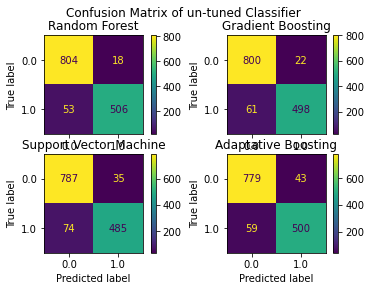

In [140]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

random_forest = RandomForestClassifier(random_state=42)
gradient_boosting = GradientBoostingClassifier(random_state=42)
svm = SVC(probability = True,random_state=42)
ada_boosting = AdaBoostClassifier(random_state=42)

random_forest.fit(x_train,y_train)
gradient_boosting.fit(x_train,y_train)
svm.fit(x_train,y_train)
ada_boosting.fit(x_train,y_train)


pred_rf = random_forest.predict(x_test)
pred_gb = gradient_boosting.predict(x_test)
pred_svm = svm.predict(x_test)
pred_ada = ada_boosting.predict(x_test)


fig,axs = plt.subplots(2, 2)
fig.suptitle('Confusion Matrix of un-tuned Classifier')




plot_confusion_matrix(random_forest,x_test,y_test,ax=axs[0,0])
axs[0, 0].set_title('Random Forest')
plot_confusion_matrix(gradient_boosting,x_test,y_test,ax=axs[0,1])
axs[0, 1].set_title('Gradient Boosting')
plot_confusion_matrix(svm,x_test,y_test,ax=axs[1,0])
axs[1, 0].set_title('Support Vector Machine')
plot_confusion_matrix(ada_boosting,x_test,y_test,ax=axs[1,1])
axs[1, 1].set_title('Adaptative Boosting')


Now let's display the two usefull metrics for our case :

In [141]:
display = pd.DataFrame({'Model' : ['Adaptative Boosting','Gradient Boosting','Random Forest','Support Vector Machine'],
                        'Accuracy' : [accuracy_score(y_test,pred_ada),accuracy_score(y_test,pred_gb),accuracy_score(y_test,pred_rf),accuracy_score(y_test,pred_svm)],
                       'Precision' : [precision_score(y_test,pred_ada),precision_score(y_test,pred_gb),precision_score(y_test,pred_rf),precision_score(y_test,pred_svm)]})
columns = ['Model', 'Accuracy','Precision']   
display.sort_values(by='Precision', ascending=False)

,Model,Accuracy,Precision
2,Random Forest,0.948588,0.965649
1,Gradient Boosting,0.939899,0.957692
3,Support Vector Machine,0.921072,0.932692
0,Adaptative Boosting,0.926140,0.920810


 We will now focus on optimizing our top 4 classifier, in order to improve our results

#### Optimizing the random forest 

In [144]:
rf = RandomForestClassifier(random_state=42)

In [145]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(1, 100, num = 20)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [1,2, 5]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)


{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [1, 6, 11, 16, 21, 27, 32, 37, 42, 47, 53, 58, 63, 68, 73, 79, 84, 89, 94, 100, None], 'min_samples_split': [1, 2, 5], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [146]:
random_forest = RandomForestClassifier(random_state=42)


rf_random = RandomizedSearchCV(estimator = random_forest, param_distributions = random_grid,scoring='precision', n_iter = 150, cv = 4, verbose=2, random_state=42, n_jobs = -1)
rf_random.fit(x_train, y_train)
rf_random.best_params_

Fitting 4 folds for each of 150 candidates, totalling 600 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   41.0s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  6.2min
[Parallel(n_jobs=-1)]: Done 600 out of 600 | elapsed: 10.6min finished


{'n_estimators': 800,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 1,
 'bootstrap': True}

Verifying that precision increased

In [147]:
rf_b = rf_random.best_estimator_
predictions=rf_b.predict(x_test)
print(precision_score(y_test,predictions))

0.9818731117824774


In [148]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [1,2,5],
    'max_features': range(5,15,2),
    'min_samples_leaf': [1],
    'min_samples_split': [4,5,6],
    'n_estimators': [700,750,800,850,900]
}
# Create a based model
rf = RandomForestClassifier(random_state=42)
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid,scoring='precision', 
                          cv = 4, n_jobs = -1, verbose = 2)
grid_search.fit(x_train, y_train)
grid_search.best_params_


Fitting 4 folds for each of 225 candidates, totalling 900 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   14.8s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:  4.5min
[Parallel(n_jobs=-1)]: Done 900 out of 900 | elapsed:  7.2min finished


{'bootstrap': True,
 'max_depth': 1,
 'max_features': 5,
 'min_samples_leaf': 1,
 'min_samples_split': 4,
 'n_estimators': 850}

Verifying that precision increased

In [149]:
rf_b = grid_search.best_estimator_
predictions=rf_b.predict(x_test)
print(precision_score(y_test,predictions))

0.9903536977491961


#### optimizing GradientBoosting

In [151]:
GB = GradientBoostingClassifier(random_state=42)

We have pretty great results with the base parameters that are : 
* learning_rate = 0.1
* min_samples_split = 2
* min_samples_leaf = 1
* max_depth = 3
* max_features = none
* subsample =  1 
* n_estimators = 100        

So we'll take those parameters as a start for our gridsearch, except for max_features

In [154]:
# First : tuning tree parameters :
param_grid = {

'learning_rate' : [0.1],
  
'min_samples_split': [2], 
    
'min_samples_leaf' : [1],

'max_depth':[3], 

'max_features' : ['sqrt'],  

'subsample' : [1],
    
'n_estimators': range(200,220,1)   ##we ended up with 210 last grid_search, so we try again with more precision.
    
}

gb_grid = GridSearchCV(estimator = GB, param_grid = param_grid, scoring = 'precision', cv = 4,n_jobs = -1, verbose = 2)
gb_grid.fit(x_train,y_train)
gb_grid.best_params_

Fitting 4 folds for each of 20 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:    6.6s finished


{'learning_rate': 0.1,
 'max_depth': 3,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 200,
 'subsample': 1}

Verifying that precision increased

In [155]:
pred = gb_grid.predict(x_test)
print(precision_score(y_test,pred))

0.9639468690702088


In [156]:
param_grid = {

'learning_rate' : [0.1],
  
'min_samples_split':range(2,1002,20), 
    
'min_samples_leaf' : [1],

'max_depth':range(1,15,1), 

'max_features' : ['sqrt'],  

'subsample' : [1],
    
'n_estimators': [200]
    
}

gb_grid = GridSearchCV(estimator = GB, param_grid = param_grid, scoring = 'precision', cv = 4,n_jobs = -1, verbose = 2)
gb_grid.fit(x_train,y_train)
gb_grid.best_params_



Fitting 4 folds for each of 700 candidates, totalling 2800 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:    5.9s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:   16.7s
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:   37.0s
[Parallel(n_jobs=-1)]: Done 997 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 1442 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 1969 tasks      | elapsed:  3.5min
[Parallel(n_jobs=-1)]: Done 2576 tasks      | elapsed:  5.3min
[Parallel(n_jobs=-1)]: Done 2800 out of 2800 | elapsed:  6.0min finished


{'learning_rate': 0.1,
 'max_depth': 11,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 200,
 'subsample': 1}

Verifying that precision increased

In [157]:
pred = gb_grid.predict(x_test)
print(precision_score(y_test,pred))


0.9660377358490566


So we have now the following fixed parameters :

* Learning rate of 0.1
* min_samples_split of 2
* max_depth of 11
* n_estimators of 200
            
now lets tune the other parameters

In [158]:
param_grid = {

'learning_rate' : [0.1],
  
'min_samples_split':[2], 
    
'min_samples_leaf' : range(1,91,1),

'max_depth':[11], 

'max_features' : ['sqrt'],  

'subsample' : [1],
    
'n_estimators': [200]
    
}
gb_grid = GridSearchCV(estimator = GB, param_grid = param_grid, scoring = 'precision', cv = 4,n_jobs = -1, verbose = 2)
gb_grid.fit(x_train,y_train)
gb_grid.best_params_



Fitting 4 folds for each of 90 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    9.8s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   35.2s
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed:  1.2min finished


{'learning_rate': 0.1,
 'max_depth': 11,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 200,
 'subsample': 1}

No change there, we keep min_samples_leaf to 1

In [160]:
# Let's tube max_features

param_grid = {

'learning_rate' : [0.1],
  
'min_samples_split':[2], 
    
'min_samples_leaf' : [1],

'max_depth':[11], 

'max_features' : range(1,20,1),  

'subsample' : [1],
    
'n_estimators': [200]
    
}  

gb_grid = GridSearchCV(estimator = GB, param_grid = param_grid, scoring = 'precision', cv = 4,n_jobs = -1, verbose = 2)
gb_grid.fit(x_train,y_train)
gb_grid.best_params_

Fitting 4 folds for each of 19 candidates, totalling 76 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   14.2s
[Parallel(n_jobs=-1)]: Done  76 out of  76 | elapsed:   43.3s finished


{'learning_rate': 0.1,
 'max_depth': 11,
 'max_features': 7,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 200,
 'subsample': 1}

Verifying that precision increased

In [161]:
pred = gb_grid.predict(x_test)
print(precision_score(y_test,pred))

0.9660377358490566


It did not change anything

In [162]:
param_grid = {

'learning_rate' : [0.1],
  
'min_samples_split':[2], 
    
'min_samples_leaf' : [1],

'max_depth':[11], 

'max_features' : [7],  

'subsample' : [0.6,0.7,0.75,0.8,0.85,0.9,0.95,1],
'n_estimators': [200]
    
}  

gb_grid = GridSearchCV(estimator = GB, param_grid = param_grid, scoring = 'precision', cv = 4,n_jobs = -1, verbose = 2)
gb_grid.fit(x_train,y_train)
gb_grid.best_params_

Fitting 4 folds for each of 8 candidates, totalling 32 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  32 out of  32 | elapsed:   14.9s finished


{'learning_rate': 0.1,
 'max_depth': 11,
 'max_features': 7,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 200,
 'subsample': 1}

Once again, no change, we have our optimized parameters, let's try to lower the learning rate

In [163]:
param_grid = {

'learning_rate' : [0.01,0.05,0.1],
  
'min_samples_split':[2], 
    
'min_samples_leaf' : [1],

'max_depth':[11], 

'max_features' : [7],  

'subsample' : [1],
'n_estimators': range(100,2000,100),
    
}  

gb_grid = GridSearchCV(estimator = GB, param_grid = param_grid, scoring = 'precision', cv = 4,n_jobs = -1, verbose = 3)
gb_grid.fit(x_train,y_train)
gb_grid.best_params_


Fitting 4 folds for each of 57 candidates, totalling 228 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:   15.2s
[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:  4.4min
[Parallel(n_jobs=-1)]: Done 228 out of 228 | elapsed:  9.9min finished


{'learning_rate': 0.1,
 'max_depth': 11,
 'max_features': 7,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 1900,
 'subsample': 1}

Verifying that precision increased

In [164]:
gb_b = gb_grid.best_estimator_
pred = gb_grid.predict(x_test)
print(precision_score(y_test,pred))

0.9781312127236581


#### Tuning SVM

In [168]:
svm = SVC(probability = True,random_state=42)


In [169]:
from sklearn.model_selection import GridSearchCV
param_grid = {

'C' : range(1,101,10),
  
'gamma':range(1,101,10), 
    
'kernel' : ['linear', 'poly', 'rbf', 'sigmoid'],
    
}
svm_grid = GridSearchCV(estimator = svm, param_grid = param_grid, scoring = 'precision', cv = 4,n_jobs = -1, verbose = 2)
svm_grid.fit(x_train,y_train)
svm_grid.best_params_

Fitting 4 folds for each of 400 candidates, totalling 1600 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   15.2s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:  4.5min
[Parallel(n_jobs=-1)]: Done 997 tasks      | elapsed:  7.4min
[Parallel(n_jobs=-1)]: Done 1442 tasks      | elapsed: 12.2min
[Parallel(n_jobs=-1)]: Done 1600 out of 1600 | elapsed: 15.0min finished


{'C': 1, 'gamma': 91, 'kernel': 'rbf'}

Verifying that precision increased

In [185]:
svm_b = svm_grid.best_estimator_
predictions = svm_b.predict(x_test)
print(precision_score(y_test,predictions))

0.9719101123595506


In [174]:
param_grid = {

'C' : [1],
  
'gamma':range(80,100,1), 
    
'kernel' : ['rbf'],
    
}
svm_grid_2 = GridSearchCV(estimator = svm, param_grid = param_grid, scoring = 'precision', cv = 4,n_jobs = -1, verbose = 2)
svm_grid_2.fit(x_train,y_train)
svm_grid_2.best_params_

Fitting 4 folds for each of 20 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   22.6s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:  1.1min finished


{'C': 1, 'gamma': 96, 'kernel': 'rbf'}

Verifying that precision increased

In [178]:
svm_b_1 = svm_grid_2.best_estimator_
predictions = svm_b_1.predict(x_test)
print(precision_score(y_test,predictions))

0.9715099715099715


Gamma too high, a bit of overfitting, we'll keep gamma = 91

#### Now let's tune AdaBoost

In [180]:
ada = AdaBoostClassifier(random_state=42)

In [181]:

param_grid = {
'base_estimator' : [DecisionTreeClassifier(random_state = 42),RandomForestClassifier(random_state=42)],
    
'learning_rate' : [0.1,0.5,1],
'n_estimators': range(1,501,20)
}
    
ada_grid = GridSearchCV(estimator = ada, param_grid = param_grid, scoring = 'precision', cv = 4,n_jobs = -1, verbose = 2)
ada_grid.fit(x_train,y_train)
ada_grid.best_params_

Fitting 4 folds for each of 150 candidates, totalling 600 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 276 tasks      | elapsed:    3.3s
[Parallel(n_jobs=-1)]: Done 517 tasks      | elapsed:   27.2s
[Parallel(n_jobs=-1)]: Done 600 out of 600 | elapsed:   35.3s finished


{'base_estimator': RandomForestClassifier(random_state=42),
 'learning_rate': 0.1,
 'n_estimators': 1}

In [182]:
ada_b= ada_grid.best_estimator_
predictions = ada_b.predict(x_test)
print(precision_score(y_test,predictions))

0.9621212121212122


Text(0.5, 1.0, 'Adaptative Boosting')

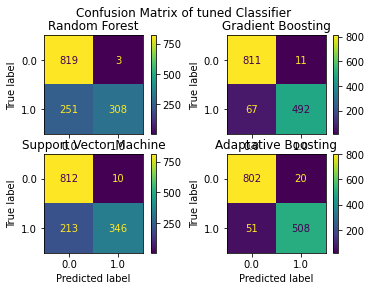

In [194]:
pred_rf_b = rf_b.predict(x_test)
pred_gb_b = gb_b.predict(x_test)
pred_svm_b = svm_b.predict(x_test)
pred_ada_b = ada_b.predict(x_test)


fig,axs = plt.subplots(2, 2)
fig.suptitle('Confusion Matrix of tuned Classifier')




plot_confusion_matrix(rf_b,x_test,y_test,ax=axs[0,0])
axs[0, 0].set_title('Random Forest')
plot_confusion_matrix(gb_b,x_test,y_test,ax=axs[0,1])
axs[0, 1].set_title('Gradient Boosting')
plot_confusion_matrix(svm_b,x_test,y_test,ax=axs[1,0])
axs[1, 0].set_title('Support Vector Machine')
plot_confusion_matrix(ada_b,x_test,y_test,ax=axs[1,1])
axs[1, 1].set_title('Adaptative Boosting')


In [187]:
display = pd.DataFrame({'Model' : ['Adaptative Boosting','Gradient Boosting','Random Forest','Support Vector Machine'],
                        'Accuracy' : [accuracy_score(y_test,pred_ada_b),accuracy_score(y_test,pred_gb_b),accuracy_score(y_test,pred_rf_b),accuracy_score(y_test,pred_svm_b)],
                       'Precision' : [precision_score(y_test,pred_ada_b),precision_score(y_test,pred_gb_b),precision_score(y_test,pred_rf_b),precision_score(y_test,pred_svm_b)]})
columns = ['Model', 'Accuracy','Precision']   
display.sort_values(by='Precision', ascending=False)

,Model,Accuracy,Precision
2,Random Forest,0.816075,0.990354
1,Gradient Boosting,0.943519,0.978131
3,Support Vector Machine,0.838523,0.971910
0,Adaptative Boosting,0.948588,0.962121


In [196]:
best_precision_model = rf_b
best_overall_model= gb_b

#### Exporting Model

In [197]:
import pickle
filename = "finalized_model.pickle"
with open(filename, 'wb') as file:
    pickle.dump(best_precision_model, file)
